# Introducció Eines per Python

En aquest quadern aprendrem les bases de la biblioteca Pandas per a científics de dades.

Hem extret el contingut del quadern del llibre ["Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications"](http://www.springer.com/gp/book/9783319500164) i del propi repositori de [github](https://github.com/DataScienceUB/introduction-datascience-python-book) 



Comencem per importar els paquets que necessitarem per al nostre programa. A la primera cel·la posem el codi per importar la biblioteca `pandas` com a` pd`. Això és per comoditat; cada vegada que necessitem utilitzar algunes funcionalitats de la biblioteca de pandas, escriurem `pd` en lloc de` pandas`. També importarem la biblioteca `numpy` com a `np` i la biblioteca `matplotlib.pyplot` com a `plt`.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import calendar
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=False)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

### DataFrames 

L’estructura de dades clau de Pandas és l’objecte **DataFrame**. Un DataFrame és bàsicament una estructura de dades tabular, amb files i columnes. Les files tenen un índex específic per accedir-hi, que pot ser qualsevol nom o valor. A Pandas, les columnes s’anomenen **Series**, un tipus especial de dades, que bàsicament consisteix en una llista de diversos valors, on cada valor té un índex.
Per tant, l’estructura de dades de DataFrame es pot veure com un full de càlcul, però és molt més flexible.

### Creació d’un nou DataFrame des de zero
 



Per entendre com funciona, vegem com es crea un DataFrame a partir d’un diccionari de llistes Python comú.


En aquest exemple, fem servir el constructor d'objectes `DataFrame` amb un diccionari de llistes com a argument.
El valor de cada entrada del diccionari és el nom de la columna i les llistes són els seus valors.
Les columnes DataFrame es poden organitzar en el moment de la construcció introduint una paraula clau `columns` amb una llista dels noms de les columnes ordenades com vulguem. Si la paraula clau de columna no és present al constructor, les columnes s’ordenaran per ordre alfabètic.

In [61]:
data = {'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF',
                 'ValenciaCF', 'ValenciaCF'],
        'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }
football = pd.DataFrame(data, 
                        columns=['year', 'team', 'wins', 'draws', 'losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


El resultat és una taula on cada entrada del diccionari és una columna. L’índex de cada fila es crea automàticament prenent la posició dels seus elements dins de les llistes d’entrades, a partir de 0.
Tot i que és molt fàcil crear DataFrames des de zero, la majoria de vegades el que haurem de fer és importar trossos de dades a una estructura DataFrame, veurem com fer-ho en exemples posteriors.

### Exemple d’anàlisi de dades del govern obert mitjançant Pandas

Per il·lustrar com podem utilitzar Pandas en un problema real simple, començarem a fer una anàlisi bàsica de dades governamentals. Per motius de transparència, les dades produïdes per entitats governamentals han d’estar obertes, és a dir, que qualsevol persona les pugui utilitzar, reutilitzar i distribuir lliurement. Un exemple d'això és l'Eurostat, que és la llar de les dades de la Comissió Europea. El paper principal d’Eurostat és processar i publicar informació estadística comparable a nivell europeu. Les dades d’Eurostat són proporcionades per cada estat membre i és lliure de reutilitzar-les, tant amb finalitats no comercials com comercials (amb algunes excepcions menors).


Com que la quantitat de dades a la base de dades Eurostat és enorme, en el nostre primer estudi només ens centrarem en dades relatives als indicadors de finançament educatiu dels estats membres. Per tant, el primer que cal fer és recuperar aquestes dades de l’Eurostat. Com que les dades obertes s’han de lliurar en format de text pla, els formats CSV (o qualsevol altre valor separat per delimitador) s’utilitzen habitualment per emmagatzemar dades tabulars. En un fitxer de valor separat per delimitador, cada línia és un registre de dades i cada registre consta d’un o més camps, separats pel caràcter delimitador (normalment una coma). Per tant, les dades que farem servir ja es poden descarregar i preprocessar com a fitxer CSV *educ_figdp_1_Data.csv*. Per descomptat, també es pot descarregar com a dades tabulars no processades del lloc de la base de dades Eurostat [lloc de la base de dades Eurostat](http://ec.europa.eu/eurostat/data/database)
seguint el camí:  `Tables by themes > Population and social conditions > 
Education and training > Education > Indicators on education finance > Public expenditure on education` 

## Lectura de dades tabulars

Comencem a llegir les dades que hem descarregat.
La manera de llegir fitxers CSV (o qualsevol altre valor separat, proporcionant el caràcter separador) a Pandas és mitjançant la crida al mètode `read_csv`. A més del nom del fitxer, afegim l'argument clau *na_values* a aquest mètode juntament amb el caràcter que representa "dades no disponibles" al fitxer. Normalment, els fitxers CSV tenen una capçalera amb els noms de les columnes. Si aquest és el cas, podem utilitzar el paràmetre *usecols* per seleccionar quines columnes del fitxer s’utilitzaran.



In [3]:
edu = pd.read_csv('data/educ_figdp_1_Data.csv',
                  na_values=':', usecols=['TIME', 'GEO', 'Value'])
display(edu)

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85



En aquest cas, el DataFrame resultant de la lectura de les nostres dades s’emmagatzema a **edu**. La sortida de l'execució mostra que la mida d'`edu` DataFrame és de 384 files × 3 columnes. Com que DataFrame és massa gran per mostrar-se completament, apareixen tres punts al centre de cada fila.

A més, Pandas també té funcions per llegir fitxers amb formats com Excel, HDF5, fitxers tabulats o fins i tot el contingut del portapapers (`read_excel(), read\_hdf(), read\_table(), read\_clipboard()`) . Independentment de la funció que fem servir, el resultat de la lectura d’un fitxer s’emmagatzema com una estructura de DataFrame.
 



## Visualització de dades

Per veure l'aspecte de les dades, podem utilitzar el mètode `head()`, que mostra només les cinc primeres files. si posem un número com a argument a aquest mètode, aquest serà el nombre de les primeres files que es mostren.

In [4]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


De la mateixa manera, existeix el mètode **tail()**, que retorna les darreres cinc files per defecte.

In [5]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Si volem conèixer els noms de les columnes o els noms dels índexs, podem utilitzar els atributs DataFrame **columns** i **index** respectivament. Els noms de les columnes o índexs es poden canviar assignant una llista nova de la mateixa longitud a aquests atributs.

In [6]:
edu.columns 

Index(['TIME', 'GEO', 'Value'], dtype='object')

In [7]:
edu.index

RangeIndex(start=0, stop=384, step=1)

Els valors de qualsevol DataFrame es poden recuperar com a matriu Python cridant al seu atribut **values**.

In [8]:
edu.values

array([[2000, 'European Union (28 countries)', nan],
       [2001, 'European Union (28 countries)', nan],
       [2002, 'European Union (28 countries)', 5.0],
       ...,
       [2009, 'Finland', 6.81],
       [2010, 'Finland', 6.85],
       [2011, 'Finland', 6.76]], dtype=object)

Si només volem informació estadística ràpida sobre totes les columnes numèriques d’un marc de dades, podem utilitzar la funció **describe()**. El resultat mostra el recompte, la mitjana, la desviació estàndard, el mínim i el màxim i els percentils, de manera predeterminada, el 25è, el 50è i el 75è, per a tots els valors de cada columna o sèrie.

In [9]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


## Selecció

Si volem seleccionar un subconjunt de dades d'un DataFrame, és necessari indicar aquest subconjunt mitjançant claudàtors **[ ]** després del DataFrame. El subconjunt es pot especificar de diverses maneres. Si volem seleccionar només una columna d'un DataFrame, només hem de posar el seu nom entre claudàtors. El resultat serà una estructura de dades de la sèrie, no un DataFrame, perquè només es recupera una columna.

In [10]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

Si volem seleccionar un subconjunt de files d'un DataFrame, podem fer-ho indicant un rang de files separades per **:** dins dels claudàtors. Això es coneix comunment com a *slice* de files.

La següent instrucció retorna el segment de files de la posició 10a a 13a. Tingueu en compte que el segment no utilitza les etiquetes d'índex com a referències, sinó la posició. En aquest cas, les etiquetes de les files coincideixen simplement amb la posició de les files.

In [11]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


## Filtrant Dades

Una altra manera de seleccionar un subconjunt de dades és aplicant la indexació booleana. Aquesta indexació es coneix comunament com a *filter*. Per exemple, si volem filtrar aquests valors inferiors o iguals a 6.5, ho podem fer així:

In [12]:
edu[edu['Value'] > 6.5]

,TIME,GEO,Value
93,2009,Belgium,6.57
94,2010,Belgium,6.58
95,2011,Belgium,6.55
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43
125,2005,Denmark,8.30
126,2006,Denmark,7.97


La indexació booleana utilitza el resultat d’una operació booleana sobre les dades, retornant una màscara amb True o False per a cada fila. Es seleccionaran les files marcades com a True a la màscara. A l'exemple anterior, l'operació booleana `edu['Value'] > 6.5` produeix una màscara booleana. Quan un element de la columna *`Value`* és superior a 6.5, el valor corresponent de la màscara s'estableix en `True`, en cas contrari es defineix en `False`. Després, quan aquesta màscara s'aplica com a índex a `edu[edu['Value'] > 6.5]`, el resultat és un DataFrame filtrat que conté només files amb valors superiors a 6,5. Per descomptat, qualsevol dels operadors booleans habituals es pot utilitzar per filtrar: < (menor que), <= (menor o igual a), > (major que), >= (major o igual a), == (igual a), != (no igual a).

Quan tractem amb la selecció de columnes i de files per a realitzar aquestos filtres s'utilitzen normalment dos tipos de funcions:

1. **loc** selects rows and columns with specific labels
2. **iloc** selects rows and columns at specific integer positions

**Per a veure una mica el seu funcionament agafem , per exemple,  les labels 93 i 94 i les Columnes TIME i GEO**

In [13]:
edu.loc[[93,94], ["TIME","GEO"]]

,TIME,GEO
93,2009,Belgium
94,2010,Belgium


**A més a més podem fer slicings per quedarmos només amb una secció sensera del frame**

In [14]:
edu.loc[0:130, :"GEO"]

,TIME,GEO
0,2000,European Union (28 countries)
1,2001,European Union (28 countries)
2,2002,European Union (28 countries)
3,2003,European Union (28 countries)
4,2004,European Union (28 countries)
...,...,...
126,2006,Denmark
127,2007,Denmark
128,2008,Denmark
129,2009,Denmark


**Amb la funció iloc podem realitzar lo mateix però amb indexos no amb labels concretes**

In [15]:
edu.iloc[0:131, 0:2]

,TIME,GEO
0,2000,European Union (28 countries)
1,2001,European Union (28 countries)
2,2002,European Union (28 countries)
3,2003,European Union (28 countries)
4,2004,European Union (28 countries)
...,...,...
126,2006,Denmark
127,2007,Denmark
128,2008,Denmark
129,2009,Denmark


> Per a més informació de com a realitzar filtrats de manera més específica podeu mirar els següents dos links. 
https://www.statology.org/pandas-loc-multiple-conditions/ **O**
https://www.statology.org/pandas-select-rows-based-on-column-values/

## Filtrar els valors que falten
 

Pandas utilitza el valor especial **NaN** (no un número) per representar els valors que falten. A Python, `NaN` és un valor de coma flotant especial retornat per determinades operacions quan un dels seus resultats acaba en un valor no definit. Una característica subtil dels valors de `NaN` és que dos `NaN` mai són iguals. Per això, l'única forma segura de saber si falta un valor en un DataFrame és mitjançant la funció `isnull ()`. De fet, aquesta funció es pot utilitzar per filtrar files amb valors que falten:

In [16]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


## Manipulació de dades

Un cop sabem seleccionar les dades desitjades, el següent que hem de saber és com manipular les dades.
Una de les coses més senzilles que podem fer és operar amb columnes o files mitjançant funcions d’agregació. La llista següent mostra les funcions d’agregació més comunes.

| Funció  | Descripció | 
|-----------|-------------|
| count()   |Número de observacion no nules|  
| sum()     |Suma dels valors|
| mean()    |Mitjana dels valors | 
| median()  |Mediana dels valors   |
| min()     |Minim|
| max()     |Maxim|
| prod()    |Producte dels valors|
| std()     |Desviació estandar|
| var()     |Variança|

El resultat de totes aquestes funcions aplicades a una fila o columna sempre és un número. Si s’aplica una funció a un DataFrame o a una selecció de files i columnes, podeu especificar si s’ha d’aplicar la funció a les files de cada columna (posant la paraula clau **axis = 0** a la invocació de la funció) o bé s’hauria d’aplicar a les columnes de cada fila (posant la paraula clau **axis = 1** a la invocació de la funció).

In [17]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

Tingueu en compte que aquestes són funcions específiques de Pandas, no les funcions genèriques de Python. Hi ha diferències en la seva implementació. A Python, els valors `NaN` es propaguen a través de totes les operacions sense generar una excepció. En canvi, les operacions a Pandas exclouen els valors `NaN` que representen les dades que falten. Per exemple, la funció pandes **max** exclou els valors de `NaN`, per tant, s'interpreten com a valors que falten, mentre que la funció estàndard de Python **max** prendrà la interpretació matemàtica de `NaN` i la retornarà com a màxima :

In [18]:
print('Pandas max function:', edu['Value'].max())
print('Python max function:', max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Una altra operació bàsica de manipulació és establir nous valors al nostre DataFrame. Això es pot fer directament mitjançant l'operador d'assignació ** = ** sobre un DataFrame. Per exemple, per afegir una nova columna a un DataFrame, podem assignar una sèrie a una selecció d’una columna que no existeix. Això produirà una nova columna al DataFrame després de totes les altres. Heu de tenir en compte que si ja existeix una columna amb el mateix nom, els valors anteriors se sobreescriuran. A l'exemple següent, assignem la sèrie que resulta de dividir la columna "Value" pel valor màxim de la mateixa columna a una nova columna anomenada "ValueNorm".

In [22]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Ara, si volem eliminar aquesta columna del DataFrame, podem utilitzar la funció **drop**; això elimina les files indicades si **axis = 0**, o les columnes indicades si **axis=1**. A Pandas, totes les funcions que canvien el contingut d’un DataFrame, com ara la funció drop, normalment retornaran una còpia de les dades modificades, en lloc de sobreescriure el DataFrame. Per tant, es conserva el DataFrame original. Si no voleu conservar els valors antics, podeu establir la paraula clau **inplace=True**. Per defecte, aquesta paraula clau s'estableix en "False", és a dir, es retorna una còpia de les dades.

In [23]:
edu.drop('ValueNorm', axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Finalment, si volem eliminar aquesta fila, hem de tornar a utilitzar la funció **drop**. Ara hem d’establir l’axis a 0 i especificar l’índex de la fila que volem eliminar. Com que volem eliminar l'última fila, podem utilitzar la funció màx sobre els índexs per determinar quina fila és.
 


In [25]:
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Per eliminar els valors de `NaN`, en lloc de la funció de `drop` genèrica, podem utilitzar la funció específica de **dropna()**. Si volem esborrar qualsevol fila que contingui un valor `NaN`, hem d'establir la paraula clau **how** a *any*. Per restringir-lo a un subconjunt de columnes, el podem especificar mitjançant la paraula clau **subset**. Com podem veure a continuació, el resultat serà el mateix que amb la funció **drop**:

In [26]:
eduDrop = edu.dropna(how='any', subset=['Value'], axis=0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


Si, en lloc d’eliminar les files que contenen `NaN`, volem omplir-les amb un altre valor, podem utilitzar el mètode **fillna()**, especificant quin valor s’ha d’utilitzar. Si volem omplir només algunes columnes específiques, hem de posar com a argument a la funció **fillna()** un diccionari amb el nom de les columnes com a clau i quin caràcter s’ha d’utilitzar per omplir com a valor.

In [27]:
eduFilled = edu.fillna(value={'Value': 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Ordenació

Una altra funcionalitat important que necessitarem en inspeccionar les nostres dades és ordenar per columnes. Podem ordenar un DataFrame mitjançant qualsevol columna mitjançant la funció **sort**. Si volem veure les primeres cinc files de dades ordenades en ordre descendent (és a dir, del valor més gran al més petit) i utilitzant la columna *"Value"*, només hem de fer això:

In [28]:
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Tingueu en compte que la paraula clau **inplace** significa que el DataFrame se sobreescriurà i, per tant, no es retornarà cap DataFrame nou. Si en lloc d’**ascending=False** fem servir **ascending = True**, els valors s’ordenen en ordre ascendent (és a dir, des dels valors més petits fins als més grans).

Si volem tornar a l'ordre original, podem ordenar per un índex mitjançant la funció **sort_index** i especificant **axis=0**:


In [29]:
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Agrupació



Una altra manera molt útil d’inspeccionar les dades és agrupar-les segons alguns criteris. Per exemple, en el nostre exemple seria bo agrupar totes les dades per països, independentment de l'any. Pandas té la funció **groupby** que ens permet fer exactament això. El valor que retorna aquesta funció és un DataFrame agrupat especial. Per tenir un DataFrame adequat com a resultat, cal aplicar una funció d’agregació. Per tant, aquesta funció s'aplicarà a tots els valors del mateix grup.


Per exemple, en el nostre cas, si volem un DataFrame que mostri la mitjana dels valors de cada país durant tots els anys, podem obtenir-lo agrupant-lo segons el país i utilitzant la funció mitjana com a mètode d’agregació de cada grup. El resultat seria un DataFrame amb països com a índexs i els valors mitjans com a columna:
 


In [37]:
group = edu[['GEO', 'Value']].groupby('GEO')
display(group.mean())

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333
Denmark,8.331667
Estonia,5.270833
Euro area (13 countries),5.019091
Euro area (15 countries),5.025455


## Reordenació

Fins ara, els nostres índexs eren només una numeració de files sense gaire significat. Podem transformar la disposició de les nostres dades, redistribuint els índexs i les columnes per a una millor manipulació de les nostres dades, que normalment condueix a un millor rendiment. Podem reordenar les nostres dades mitjançant la funció **pivot_table**. Aquí podem especificar quines columnes seran els nous índexs, els nous valors i les noves columnes.

Per exemple, imaginem que volem transformar el nostre DataFrame a una estructura semblant a un full de càlcul amb els noms de país com a índex, mentre que les columnes seran els anys que començaran a partir del 2006 i els valors seran la columna *`Value`* anterior. Per fer-ho, primer hem de filtrar les dades i després pivotar-les d'aquesta manera:

In [38]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values='Value',
                        index=['GEO'], columns=['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Ara podem utilitzar el nou índex per seleccionar files específiques per etiqueta, mitjançant l'operador **loc**:

In [39]:
pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


Pivot també ofereix l'opció de proporcionar un argument **aggr_function** que ens permeti realitzar una funció d'agregació entre els valors si hi ha més d'un valor per a la fila i la columna donades després de la transformació. Com és habitual, podeu dissenyar qualsevol funció personalitzada que vulgueu, simplement donant el seu nom o utilitzant una funció `lambda`.


## Rànquing Dades

Una altra característica de visualització útil és classificar les dades. Per exemple, ens agradaria saber com es classifica cada país per anys. Per veure-ho, utilitzarem la funció de pandas **rank**. Però, primer, hem de netejar una mica la nostra taula dinàmica anterior perquè només tingui països reals amb dades reals. Per fer-ho, primer deixem caure les entrades de la zona de l’euro i escurcem l’entrada de nom d’Alemanya, mitjançant la funció **rename** i després deixem caure totes les files que contenen qualsevol `NaN`, mitjançant la funció **dropna**.

Ara podem realitzar la classificació mitjançant la funció **rank**. Tingueu en compte aquí que el paràmetre `ascending=False` fa que la classificació passi dels valors més alts als valors més baixos. La funció de classificació de Pandas admet diferents mètodes de desempat, especificats amb el paràmetre **method**. En el nostre cas, fem servir el mètode **first**, en què s’assignen els rangs en l’ordre en què apareixen a la matriu, evitant espais entre la classificació.

In [40]:
pivedu = pivedu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                      ], axis=0)
pivedu = pivedu.rename(
    index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


Si volem fer un rànquing global tenint en compte tots els anys, podem resumir totes les columnes i classificar el resultat. A continuació, podem ordenar els valors resultants per recuperar els cinc països principals dels darrers 6 anys, d'aquesta manera:

In [41]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

## Visualitzacions

Els DataFrame i les Series de Pandas es poden representar mitjançant la funció **plot**, que utilitza la biblioteca per a gràfics *Matplotlib*.

Per exemple, si volem representar els valors acumulats per a cada país durant els darrers 6 anys, podem agafar la sèrie obtinguda a l’exemple anterior i representar-la directament cridant a la funció **plot**:

Tingueu en compte que si volem que les barres s’ordenin del valor més alt al més baix, primer hem d’ordenar els valors de la sèrie. El tipus de paràmetre utilitzat a la funció de **plot** defineix quin tipus de gràfic s'utilitzarà. En el nostre cas, un gràfic de barres. El parametre **style** fa referència a les propietats de l’estil del gràfic, en el nostre cas, el color de les barres s’estableix en **b** (blau). El canal alfa es pot modificar afegint un paràmetre de paraula clau **alpha** amb un percentatge, produint un traç més translúcid. Finalment, mitjançant la paraula clau de **title** es pot definir el nom del gràfic.

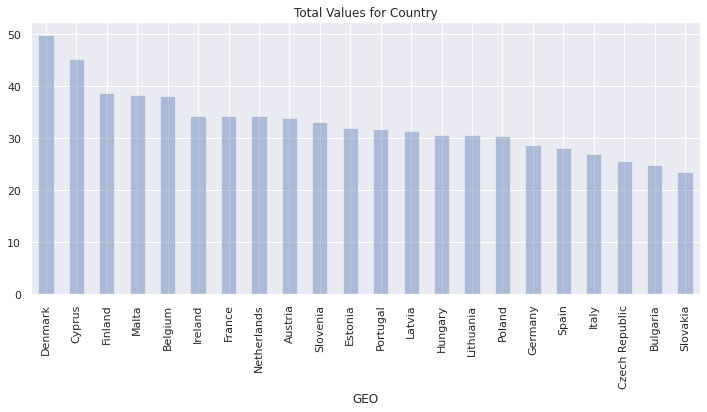

In [75]:
import seaborn as sns
sns.set()
fig = plt.figure(figsize=(12, 5))
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar', style='b', alpha=0.4,
              title='Total Values for Country')
plt.savefig('Totalvalue_Country.png', dpi=300, bbox_inches='tight')

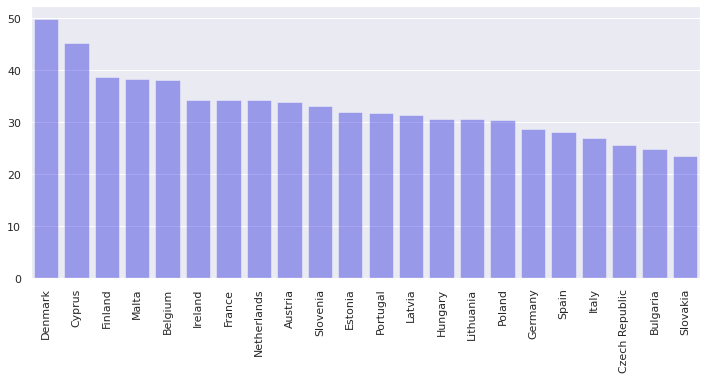

In [105]:
import seaborn as sns
sns.set()
fig = plt.figure(figsize=(12, 5))
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
labels = totalSum.index.to_numpy()
sns.barplot(y=totalSum.to_numpy(),x=labels, orient="v",alpha=0.4, color="blue")
plt.xticks(rotation="vertical")
plt.savefig('Totalvalue_Country.png', dpi=300, bbox_inches='tight')

També és possible traçar un DataFrame directament. En aquest cas, cada columna es tracta com una sèrie separada. Per exemple, en lloc d'imprimir el valor acumulat al llarg dels anys, podem representar el valor de cada any.


En aquest cas, hem utilitzat un diagrama de barres horitzontals (`kind =" barh"`) apilant tots els anys a la mateixa barra de país. Això es pot fer configurant el paràmetre **stacked** a `True`. El nombre de colors predeterminats en un plot és només de 5, per tant, si teniu més de 5 sèries per mostrar, haureu d'especificar més colors o, en cas contrari, es tornarà a utilitzar el mateix conjunt de colors. Podem establir un nou conjunt de colors mitjançant la paraula clau **color** amb una llista de colors. Els colors bàsics tenen assignat un codi d'un sol caràcter, per exemple, "b" és per al blau, "r" per al vermell, "g" per al verd, "y" per al groc, "m" per al magenta i "c" per a cian. Quan es mostren diverses sèries en un plot, es crea una llegenda per identificar-les. El nom de cada sèrie és el nom de la columna del DataFrame. Per defecte, la llegenda va a l’interior de la zona del plot. Si volem canviar-ho, podem utilitzar la funció **legend** de l’objecte `axis` (aquest és l’objecte retornat quan es crida la funció gràfica). En utilitzar la paraula clau **loc**, podem establir la posició relativa de la llegenda respecte al plot. Pot ser una combinació de dreta o esquerra i superior, inferior o central. Amb **bbox_to_anchor** podem establir una posició absoluta respecte al plot, cosa que ens permet situar la llegenda fora del gràfic.

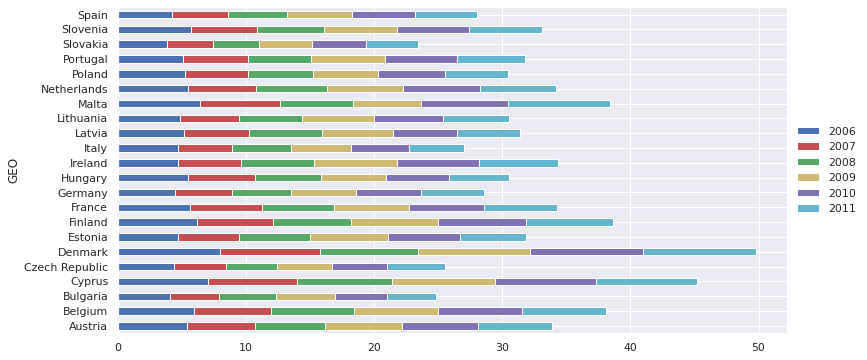

In [37]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Value_Time_Country.png', dpi=300, bbox_inches='tight')

# Una mica més?
Els pandes tenen moltes més funcionalitats. Consulteu els documents de pandes (molt llegibles) si voleu obtenir més informació:
 
http://pandas.pydata.org/pandas-docs/stable/

## Introducció al Anàlisi de datasets 

In [117]:
def load_dataset(path, delimiter=","):
    dataset = pd.read_csv(path, header=0, delimiter=delimiter)
    return dataset

def mostra_correlacions(data,especification):
    #mostra les correlacions entre els atributs 
    return sns.pairplot(data,hue=especification)


def clean_data(dataset):
    #Elimina les columnes que no conte dades numèriques
    new_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[new_col]
        

def Nan_percentatge(data):
    #Calculem quin percentatge de not a numer hi ha en el dataset amb el que estem treballant    
    percent_total = (np.count_nonzero(data.isna()) / data.size)*100
    
    #TODO completa la funció per que retorni el % de files que no tenen "nan" i un altre variable 
    #que sigui una llista amb el % de Nan per cada columna
    percentatge_files = 0
    percentatge_columnes = np.zeros(len(data.columns))
    
    return percent_total, percentatge_files, percentatge_columnes

def get_column_names(data):
    #Tenim el nom de totes les columnes
    return list(data.columns)


def get_best_correlation_features(data,lower, upper):
    #aqui mostrem les dades per a que totes es trobin en el mateix rang
    dg = data.copy()
    df = custom_fillna(data=dg)
    corr_matrix = df.corr().abs().values

    #realitzem això per eliminar les corrrelacions obvies que són gairebé 1
    corr_matrix[corr_matrix > upper] = 0
    corr_matrix[np.logical_and(corr_matrix>lower, corr_matrix<upper)] = 100
    



    converter = {value:name for name,value in zip(df,range(len(df)))}
    
    true_pairs = [(converter[p1],converter[p2]) for p1,p2 in zip(np.where(corr_matrix == 100)[0],np.where(corr_matrix == 100)[1])]
    #La última comparació la utilitzo per a que no hi hagi problemes amb la shape
    selected_feautures = list(set([j for i in true_pairs for j in i ]))
    
    
    
    return df[selected_feautures]

def custom_fillna(data,option=0):
    
    data = clean_data(data)
    #TODO
    # OPCIO 0: Elimines les files on hi ha "nan"
    # OPCIO 1: Canvies els Nan per la mitjana de la columna corresponent
    # OPCIO 2: Canvies Pel maxim
    # OPCIO 3: Canvies el nan per un nombre aleatori per un valor dintre de la distribució de les dades de la columna que no són nan
    
    if option != 0:
        df = data.select_dtypes(exclude=["object"])
        df = df.fillna(method="ffill")
        dg = df.fillna(df.mean())

    return dg




df = load_dataset("data/owid-covid-data.csv")

In [118]:
clean_data(df, get_column_names(df))

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47323,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47324,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47325,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47326,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.shape

(47328, 41)

In [45]:
display(df)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47323,NaN,NaN,International,2020-09-27,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47324,NaN,NaN,International,2020-09-28,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47325,NaN,NaN,International,2020-09-29,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47326,NaN,NaN,International,2020-09-30,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df["datetime"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='ignore')

In [47]:
covid_spain = df[df.location=="Spain"]
covid_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,datetime
13450,ESP,Europe,Spain,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2019-12-31
13451,ESP,Europe,Spain,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-01-01
13452,ESP,Europe,Spain,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-01-02
13453,ESP,Europe,Spain,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-01-03
13454,ESP,Europe,Spain,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,ESP,Europe,Spain,2020-09-26,716481.0,0.0,10920.143,31232.0,0.0,105.286,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-09-26
13721,ESP,Europe,Spain,2020-09-27,716481.0,0.0,10920.143,31232.0,0.0,105.286,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-09-27
13722,ESP,Europe,Spain,2020-09-28,748266.0,31785.0,10971.143,31411.0,179.0,106.857,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-09-28
13723,ESP,Europe,Spain,2020-09-29,758172.0,9906.0,10843.571,31614.0,203.0,101.429,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,2020-09-29


Quina correlació entre aquests atributs hi veieu?


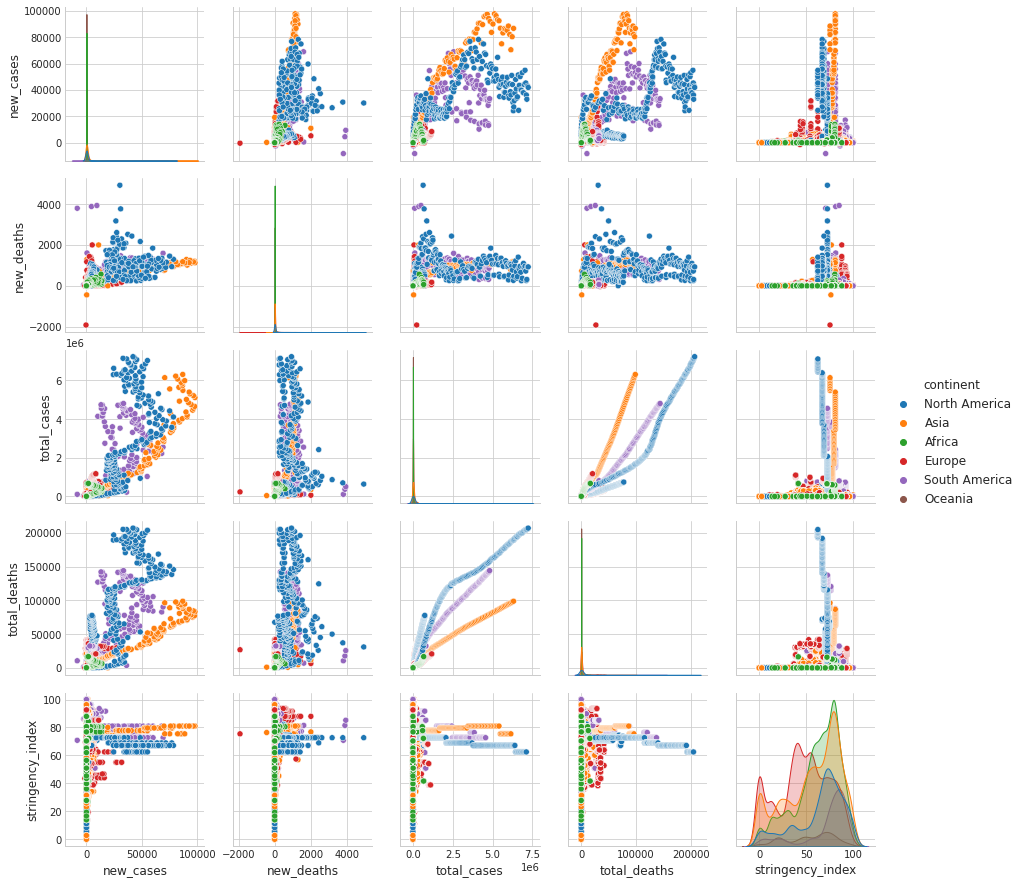

In [7]:
print("Quina correlació entre aquests atributs hi veieu?")
covid_spain = df[df.location=="Spain"]
selected_columns = ["location", "new_cases", "new_deaths", "total_cases", "total_deaths", "stringency_index", "continent"]
sns.pairplot(df[selected_columns], hue="continent")
plt.show()

I si busquem alguna correlació entre paisos per un dia concret?


<AxesSubplot:>

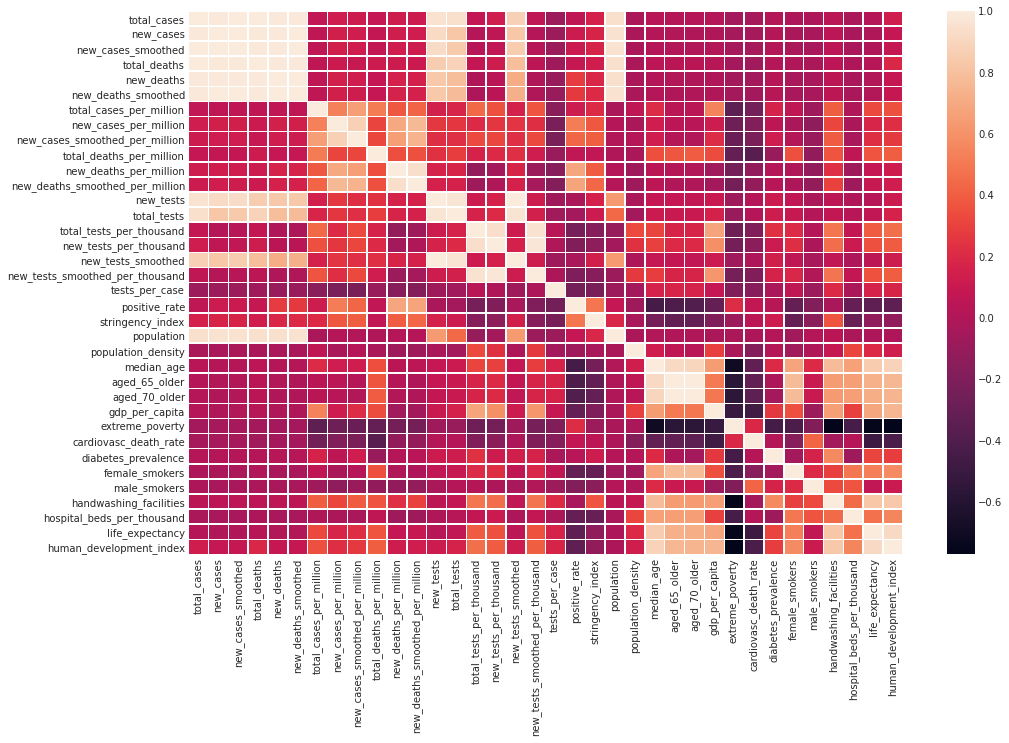

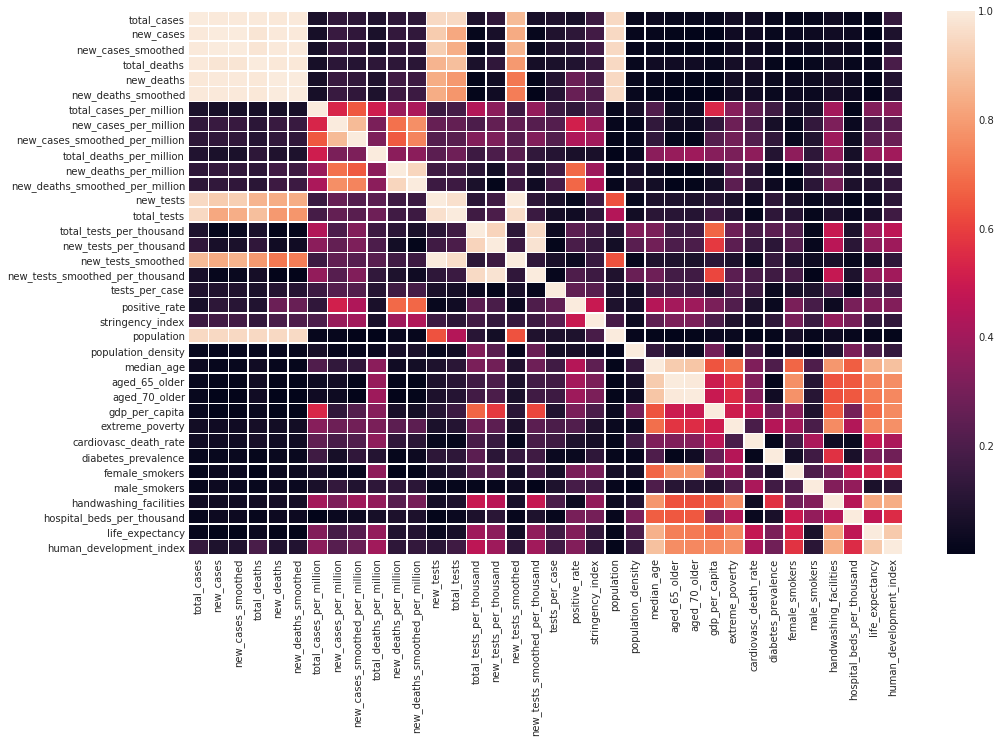

In [94]:
print("I si busquem alguna correlació entre paisos per un dia concret?")

covid_agost = df[df.date=="2020-08-01"]
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(covid_agost.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(covid_agost.corr()), annot=False, fmt="f", linewidths=.5, ax=ax)

<ipython-input-92-79bf011b29c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2020['month'] = d2020['month'].apply(lambda x: calendar.month_abbr[x])


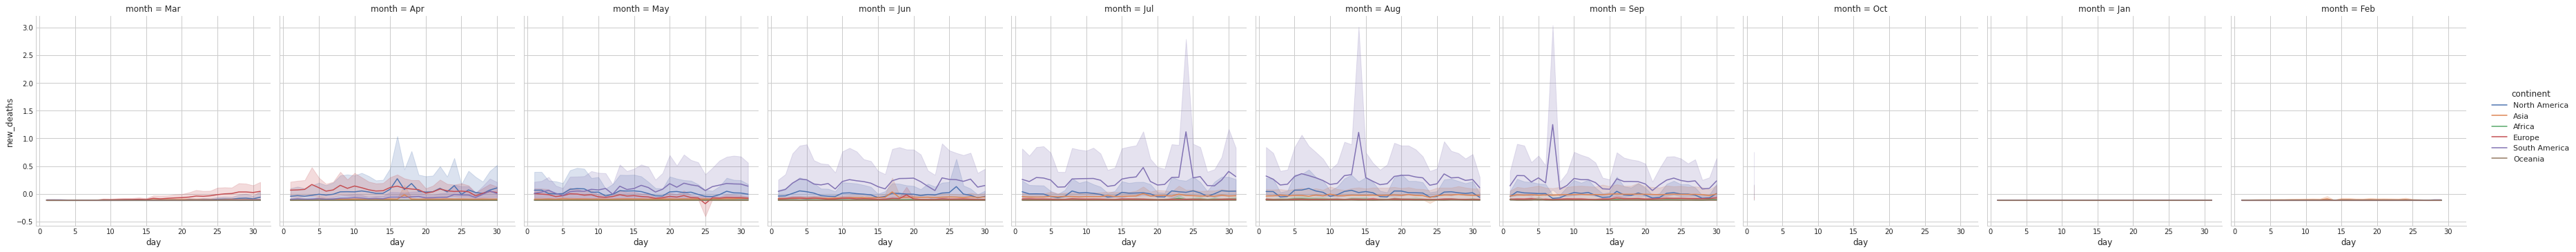

In [92]:

dataset = df[["continent","date","total_deaths","new_deaths","new_cases_smoothed","new_cases","new_deaths_smoothed","total_cases"]]
norm = normalitzador_de_dades(dataset)
norm['year'] = pd.DatetimeIndex(dataset["date"]).year
norm['month'] = pd.DatetimeIndex(dataset["date"]).month
norm["day"] = pd.DatetimeIndex(dataset["date"]).day
norm["continent"] = dataset["continent"]

d2020 = norm[norm.year == 2020]
d2020['month'] = d2020['month'].apply(lambda x: calendar.month_abbr[x])
#g = sns.lineplot(data=d2020, x="day", y="new_deaths", hue="month",style="month")
g = sns.relplot(x="day", y="new_deaths", kind="line", hue="continent",col="month",data=d2020)

Text(0.5, 1.0, 'Heatmap with a correlation in range(0.96-1)')

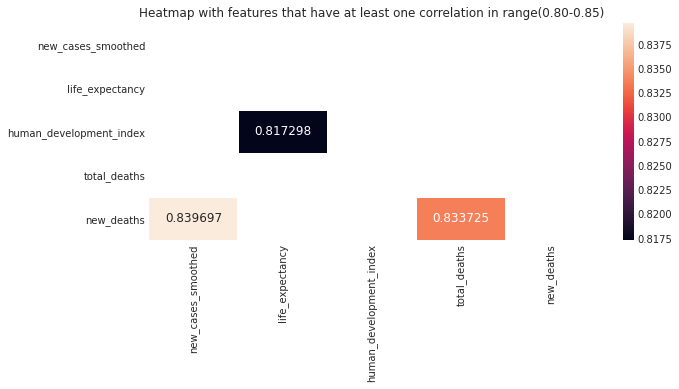

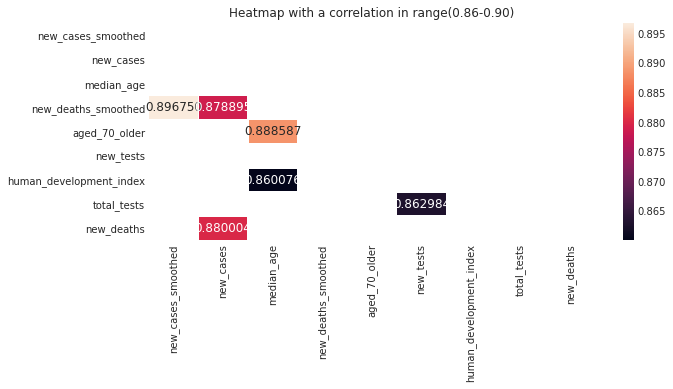

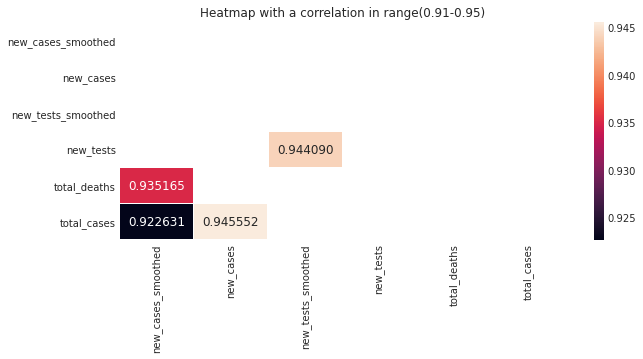

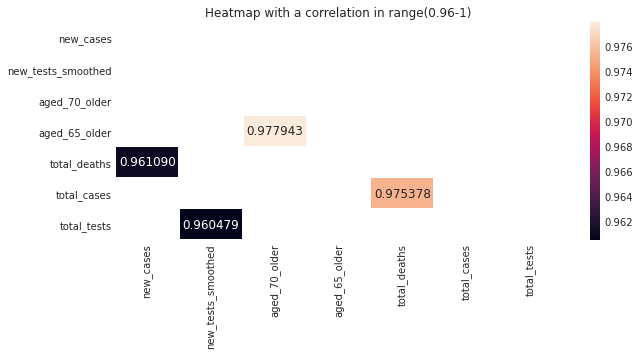

In [91]:

data = get_best_correlation_features(df,0.8,0.85)
f, ax = plt.subplots(figsize=(10, 4))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
mask[np.where(data.corr()<0.8)] = 1
mask[np.where(data.corr()>0.85)] = 1
sns.heatmap(data.corr(), annot=True, fmt="f", linewidths=.5, ax=ax,mask=mask)
ax.set_title("Heatmap with features that have at least one correlation in range(0.80-0.85)")


data = get_best_correlation_features(df,0.86,0.90)
f, ax = plt.subplots(figsize=(10, 4))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
mask[np.where(data.corr()<0.86)] = 1
mask[np.where(data.corr()>0.9)] = 1
sns.heatmap(abs(data.corr()), annot=True, fmt="f", linewidths=.5, ax=ax,mask=mask)
ax.set_title("Heatmap with a correlation in range(0.86-0.90)")

data = get_best_correlation_features(df,0.91,0.95)
f, ax = plt.subplots(figsize=(10, 4))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
mask[np.where(data.corr()<0.91)] = 1
mask[np.where(data.corr()>0.95)] = 1
sns.heatmap(data.corr(), annot=True, fmt="f", linewidths=.5, ax=ax,mask=mask)
ax.set_title("Heatmap with a correlation in range(0.91-0.95)")


data = get_best_correlation_features(df,0.96,1)
f, ax = plt.subplots(figsize=(10, 4))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
mask[np.where(data.corr()<0.96)] = 1
mask[np.where(data.corr()>1)] = 1
sns.heatmap(abs(data.corr()),annot=True, fmt="f", linewidths=.5, ax=ax,mask=mask)
ax.set_title("Heatmap with a correlation in range(0.96-1)")

## Anem a analitzar un dataset una mica més complex

In [49]:
heroes_info = load_dataset("data/heroes_information.csv")
heroes_info.drop(heroes_info.columns[0], axis=1, inplace=True)
heroes_info = heroes_info.rename(columns={'name':'hero_names'})
heroes_powers = load_dataset("data/super_hero_powers.csv")
heroes_powers.sample(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
29,Anti-Monitor,False,True,False,True,False,True,False,True,True,...,False,True,False,False,False,False,False,False,False,False
254,Ghost Rider II,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
160,Cloak,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
470,Plantman,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
378,Luke Campbell,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Pot passar que a vegades hi hagi massa informació i no tota sigui important, Hi ha moltes eines per a filtrar les features de manera manual  (TSN, PCA), en aquest cas i com ja hem vist abans podem fer servir les característiques mes correlatives

<ipython-input-50-ecfc1250afe4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

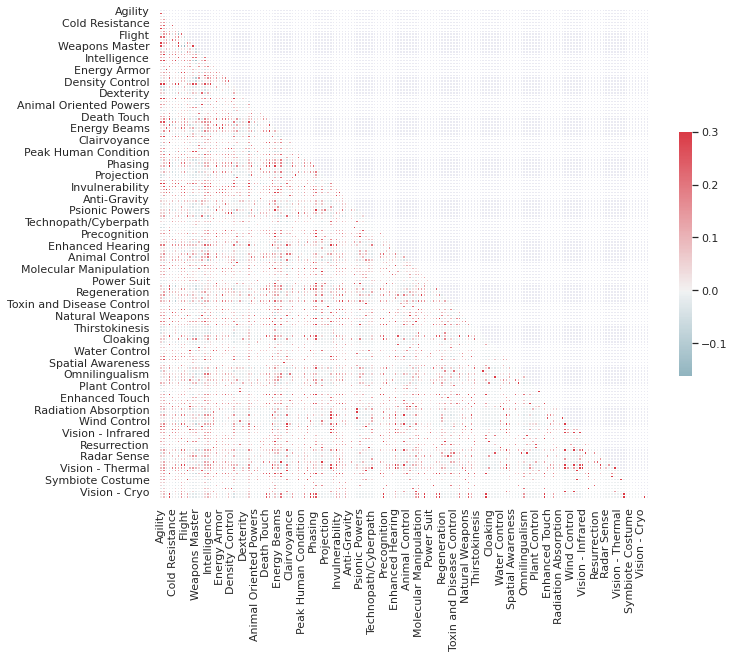

In [50]:
corr = heroes_powers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Heatmap with features that have at least one correlation in range(0.5-1)')

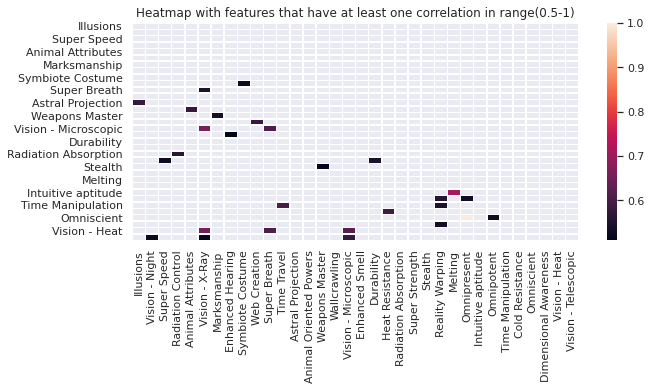

In [51]:
import sys

super_corr = get_best_correlation_features(heroes_powers,0.5,1)
f, ax = plt.subplots(figsize=(10, 4))
mask = np.zeros_like(super_corr.corr())
mask[np.triu_indices_from(mask)] = 1
mask[np.where(super_corr.corr()<0.5)] = 1
mask[np.where(super_corr.corr()>1)] = 1
sns.heatmap(super_corr.corr(), fmt="f", linewidths=.5, ax=ax,mask=mask)
ax.set_title("Heatmap with features that have at least one correlation in range(0.5-1)")

## Com Podeu observar aqui no es pot discernir gaire informació, per tant anem a asgrupar-ho per tipus de "poder". Primer hem d'agafar els més correlacionats:

In [52]:
powers = heroes_powers.corr().columns.values
for col, row in ((heroes_powers.corr().abs() > 0.45) & (heroes_powers.corr().abs() < 1)).iteritems():
    if (len(powers[row.values])>1):
        print(col, powers[row.values]) 

Agility ['Stamina' 'Reflexes']
Dimensional Awareness ['Teleportation' 'Time Manipulation' 'Reality Warping']
Weapons Master ['Stealth' 'Marksmanship']
Super Strength ['Durability' 'Super Speed']
Stamina ['Agility' 'Reflexes']
Telekinesis ['Telepathy' 'Astral Projection']
Element Control ['Omnipresent' 'Omniscient']
Astral Projection ['Telekinesis' 'Illusions']
Reflexes ['Agility' 'Stamina']
Enhanced Hearing ['Enhanced Smell' 'Vision - Telescopic']
Omnipotent ['Reality Warping' 'Omnipresent' 'Omniscient']
Vision - Telescopic ['Enhanced Memory' 'Enhanced Hearing' 'Vision - Microscopic'
 'Vision - Night' 'Vision - Infrared' 'Vision - X-Ray' 'Vision - Thermal']
Molecular Combustion ['Illumination' 'Vitakinesis']
Time Manipulation ['Dimensional Awareness' 'Time Travel' 'Reality Warping']
Vision - Microscopic ['Vision - Telescopic' 'Super Breath' 'Vision - Heat' 'Vision - X-Ray']
Super Breath ['Vision - Microscopic' 'Vision - Heat' 'Vision - X-Ray']
Vision - Night ['Vision - Telescopic' 'Vis

#### Ara definim un diccionari per definir les columnes que agruparan els diferents poders

In [53]:
powers_cat = {
    'Vision':['hero_names','Vision - X-Ray','Vision - Telescopic',
               'Vision - Microscopic', 'Vision - Night',
              'Vision - Heat'],
    'Reality Distortion':['hero_names','Reality Warping', 'Dimensional Awareness', 'Omnipotent',
                         'Omnipresent', 'Omniscient', 'Dimensional Awareness', 
                         'Time Manipulation','Dimensional Travel','Shapeshifting'],
    'Strength':['hero_names','Durability','Super Strength','Super Speed','Super Breath','Stamina','Reflexes',
               'Energy Armor','Force Fields'],
    'Thermal':['hero_names','Cold Resistance','Energy Absorption','Heat Resistance',
               'Fire Resistance', 'Element Control']
}

#### Combine --> En aquest cas agafem les files on el superheroi tengui tots els poders que hem diferenciat en el diccionari anterior

In [54]:
vision = heroes_powers[(heroes_powers[powers_cat['Vision']] == True).any(axis=1)][powers_cat['Vision']]
reality_dis = heroes_powers[(heroes_powers[powers_cat['Reality Distortion']] == True).any(axis=1)][powers_cat['Reality Distortion']]
strength = heroes_powers[(heroes_powers[powers_cat['Strength']] == True).any(axis=1)][powers_cat['Strength']]
thermal = heroes_powers[(heroes_powers[powers_cat['Thermal']] == True).any(axis=1)][powers_cat['Thermal']]

In [55]:
print (vision.shape, reality_dis.shape, strength.shape, thermal.shape)

(67, 6) (107, 10) (488, 9) (137, 6)


In [56]:
vision_heroes = set(list(vision.hero_names))
reality_dist_heroes = set(list(reality_dis.hero_names))
strength_heroes = set(list(strength.hero_names))
thermal_heroes = set(list(thermal.hero_names))

**El següent plot dona tots els personatges que comparteixen poders, en els casos que veurem per exemple en el cas de poder podem veure que hi ha 15 personatges que tenen els poders de visio, de força i de distorsió de la realitat**

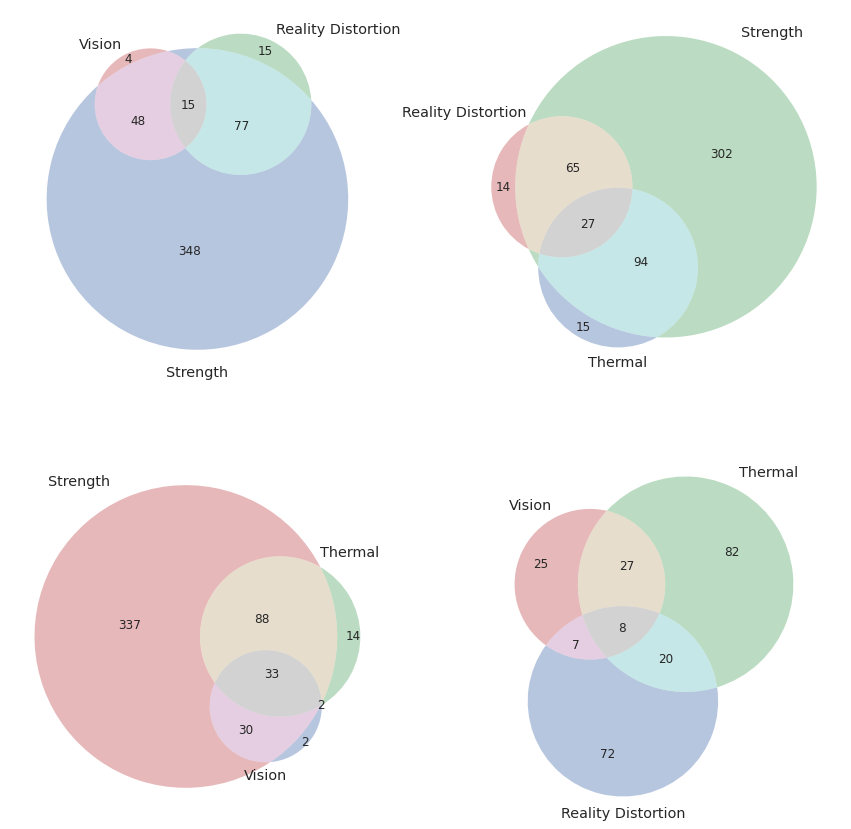

In [57]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
venn3([vision_heroes, reality_dist_heroes, strength_heroes], 
      ('Vision', 'Reality Distortion', 'Strength'), ax = ax[0][0])
venn3([reality_dist_heroes, strength_heroes, thermal_heroes], 
      ('Reality Distortion', 'Strength', 'Thermal'), ax = ax[0][1])
venn3([strength_heroes, thermal_heroes, vision_heroes], 
      ('Strength', 'Thermal', 'Vision'), ax = ax[1][0])
venn3([vision_heroes, thermal_heroes, reality_dist_heroes], 
      ('Vision', 'Thermal', 'Reality Distortion'), ax = ax[1][1])

#### Merging various dataframes
After the `merge` operation, dem el clip value of weight per definir el pes com a 0 instead of -99.

In [58]:
thermal_hero_prop = pd.merge(heroes_info, thermal, on='hero_names')
thermal_hero_prop.replace([-99, np.NaN],0, inplace=True)
realDis_hero_prop = pd.merge(heroes_info, reality_dis, on='hero_names')
realDis_hero_prop.replace(-99,0, inplace=True)
vision_hero_prop = pd.merge(heroes_info, vision, on='hero_names')
vision_hero_prop.replace(-99,0, inplace=True)

# Thermal Abilities

### Height & Weight distributions of heroes with thermal prowess.

/home/carlos/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


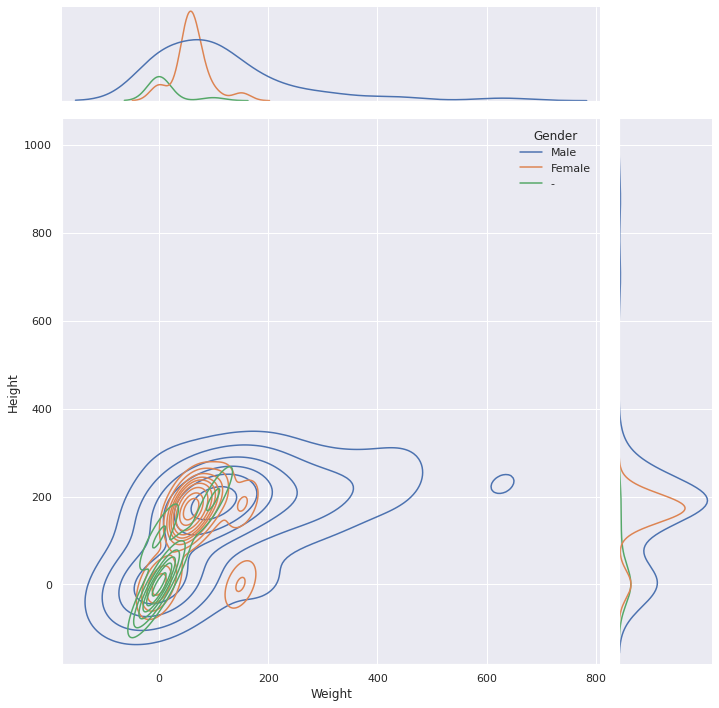

In [59]:
sns.jointplot(data=thermal_hero_prop, x=thermal_hero_prop.Weight, y=thermal_hero_prop.Height, 
              kind='kde', size=10, hue="Gender")

# PROPOSTES D'EXERCICIS

1. Durant la pràctica s'han otorgat moltes eines sobre com fer un primer anàlisi de les dades. Podrias fer un anàlisi més acurat i veure si hi ha qualque tipus d'esbiaix en les dades del dataset de super herois proposat?

2. Agafa qualsevol dataset dels que hi ha a la carpeta dataset i prova a fer qualque anàlisi de les dades que te pugui ajudar a treure informació sobre el comportament de la mostra que estas analitzant (Plots, estadístiques, IC, Correlacions, Heatmaps entre altres). Amb aquest anàlisi hauries de sebre quines dades són més importants, quines no, quines estan esbiaxades, per que, si te moltes dades redundants... ( la idea darrera això és poder entnedre i ser capaç d'optimitzar totes les aplicacions que te pot donar aquestes dades).

3. Agafa un dataset qualsevol amb un percentatge elevat de NAN (prop del 80%) dels registres han de tenir com a mínim una cela nan. Prova a substituïr aquests nans amb diferents estrategies (eliminant el registre, substituïnt per la mitjana, mediana, std lo que se't ocurri) i prova a fer un anàlisi de que és lo que li pot passar a la distribució de les dades amb cada tipus de canvi

4. !! Prova a descarregar el paquet "pandas_profiling" amb la comana **!pip install pandas-profiling** i executa-ho sobre un dataset (petit). Quina informació et dona el Pandas Profiling que també hi hagi al notebook? I a quina no?